Dataset size: 22 samples. X_raw=(22, 2), y=(22, 1)
Normalized X shape (with bias): (22, 3)

Starting Gradient Descent...
...Training complete.
Optimal parameters (theta):
[[1.91310721]
 [7.2713146 ]
 [5.7728712 ]]


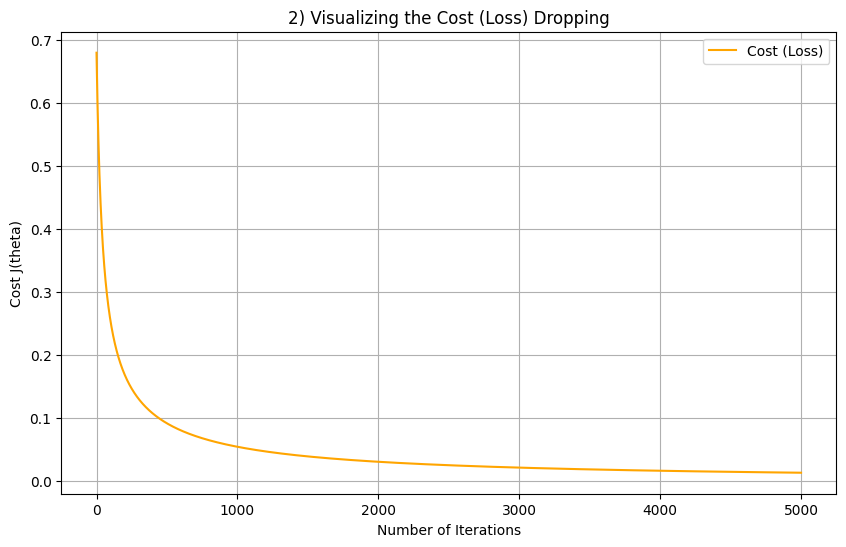


1) Test Prediction : Runner: 25 km/h, 1 Ammo Clip
   -> Predicted Class: Survive (1)


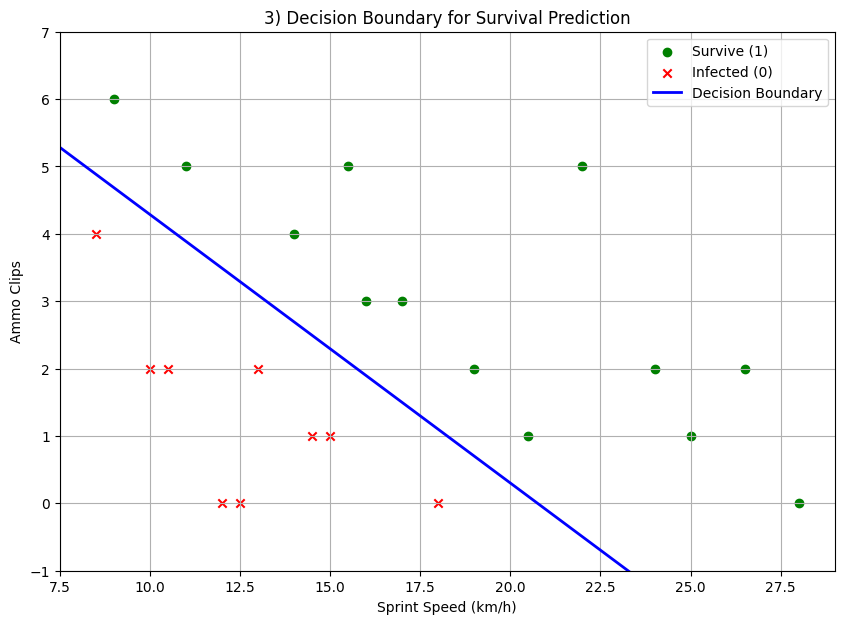

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X1_speed = np.array([
    12.0, 14.5, 10.0, 18.0, 8.5, 15.0, 22.0, 11.0,
    13.0, 20.5, 24.0, 16.0, 12.5, 28.0, 9.0, 25.0,
    14.0, 19.0, 10.5, 26.5, 15.5, 17.0
])

X2_ammo = np.array([
    0, 1, 2, 0, 4, 1, 5, 5,
    2, 1, 2, 3, 0, 0, 6, 1,
    4, 2, 2, 2, 5, 3
])

y = np.array([
    0, 0, 0, 0, 0, 0, 1, 1,
    0, 1, 1, 1, 0, 1, 1, 1,
    1, 1, 0, 1, 1, 1
]).reshape(-1, 1)

X_raw = np.vstack((X1_speed, X2_ammo)).T

print(f"Dataset size: {len(y)} samples. X_raw={X_raw.shape}, y={y.shape}")

def normalize(X):

    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1
    X_norm = (X - mean) / std
    return X_norm, mean, std

X_norm, X_mean, X_std = normalize(X_raw)

X = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))
print(f"Normalized X shape (with bias): {X.shape}")

def sigmoid(z):

    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):

    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, alpha, num_iterations):

    m = len(y)
    theta = np.zeros((X.shape[1], 1))
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X @ theta)
        error = h - y
        gradient = (1/m) * X.T @ error
        theta = theta - alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

alpha = 0.1
num_iterations = 5000

print("\nStarting Gradient Descent...")
optimal_theta, cost_history = gradient_descent(X, y, alpha, num_iterations)
print("...Training complete.")
print(f"Optimal parameters (theta):\n{optimal_theta}")

plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='orange', label='Cost (Loss)')
plt.title('2) Visualizing the Cost (Loss) Dropping')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J(theta)')
plt.grid(True)
plt.legend()
plt.show()

def predict(X, theta):

    h = sigmoid(X @ theta)
    predictions = (h >= 0.5).astype(int)
    return predictions

def test_prediction(test_speed, test_ammo, X_mean, X_std, optimal_theta):

    X_test_raw = np.array([[test_speed, test_ammo]])
    X_test_norm = (X_test_raw - X_mean) / X_std
    X_test = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

    prediction = predict(X_test, optimal_theta)[0, 0]

    result = "Survive (1)" if prediction == 1 else "Infected (0)"

    print(f"\n1) Test Prediction : Runner: {test_speed} km/h, {test_ammo} Ammo Clip")
    print(f"   -> Predicted Class: {result}")

    return prediction

test_prediction(25, 1, X_mean, X_std, optimal_theta)

def plot_decision_boundary(X_raw, y, theta, X_mean, X_std):

    x1_min, x1_max = X_raw[:, 0].min() - 1, X_raw[:, 0].max() + 1
    x2_min, x2_max = X_raw[:, 1].min() - 1, X_raw[:, 1].max() + 1

    plt.figure(figsize=(10, 7))
    X_survive_plot = X_raw[y.flatten() == 1]
    X_infected_plot = X_raw[y.flatten() == 0]

    plt.scatter(X_survive_plot[:, 0], X_survive_plot[:, 1],
                color='green', marker='o', label='Survive (1)')
    plt.scatter(X_infected_plot[:, 0], X_infected_plot[:, 1],
                color='red', marker='x', label='Infected (0)')

    x1_plot = np.array([x1_min, x1_max])
    x1_plot_norm = (x1_plot - X_mean[0]) / X_std[0]

    theta_0 = theta[0, 0]
    theta_1 = theta[1, 0]
    theta_2 = theta[2, 0]

    if abs(theta_2) < 1e-5:
        x2_plot = np.full_like(x1_plot, X_raw[:, 1].mean())
    else:
        x2_plot_norm = -(theta_0 + theta_1 * x1_plot_norm) / theta_2
        x2_plot = (x2_plot_norm * X_std[1]) + X_mean[1]

    plt.plot(x1_plot, x2_plot, color='blue', linestyle='-', linewidth=2, label='Decision Boundary')

    plt.title('3) Decision Boundary for Survival Prediction')
    plt.xlabel('Sprint Speed (km/h)')
    plt.ylabel('Ammo Clips')
    plt.legend()
    plt.grid(True)
    plt.ylim(x2_min, x2_max)
    plt.xlim(x1_min, x1_max)
    plt.show()

plot_decision_boundary(X_raw, y, optimal_theta, X_mean, X_std)